In [1]:
import timm
model_name = "caformer_b36.sail_in22k"
path = "./"+model_name+".bin"
Encoder_model = timm.create_model(model_name, pretrained=True,features_only=True,pretrained_cfg_overlay=dict(file=path))
Encoder_model = Encoder_model.eval()
data_config = timm.data.resolve_model_data_config(Encoder_model)
transforms = timm.data.create_transform(**data_config, is_training=False)

In [2]:
from PIL import Image
import os
path = "./DATAcopd/WFYC3033/CWJ (29).JPG"
character_address = path
image = Image.open(os.path.join(character_address))
image = transforms(image)

In [3]:
output = Encoder_model(image.unsqueeze(0))

In [4]:
for o in output:
    print(o.shape)

torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 768, 7, 7])


可视化所有层的平均特征图:


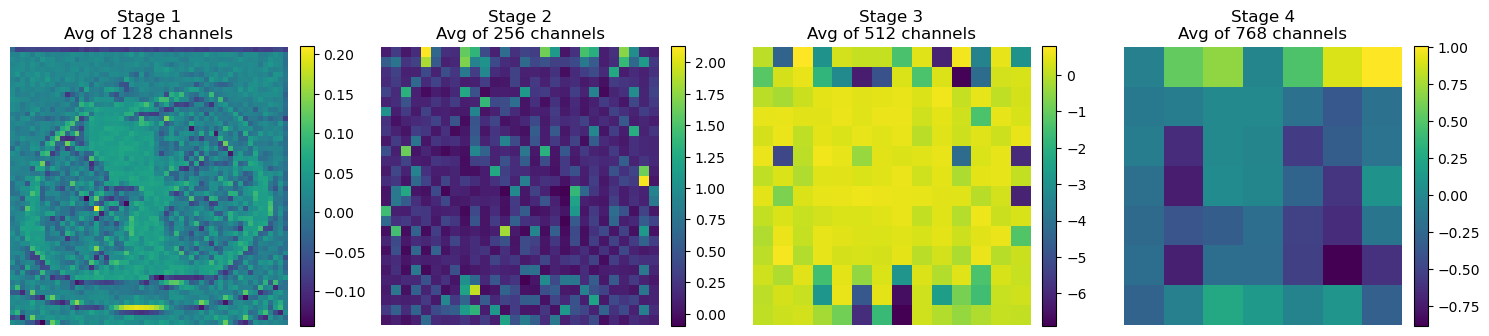


可视化所有层的特征图:


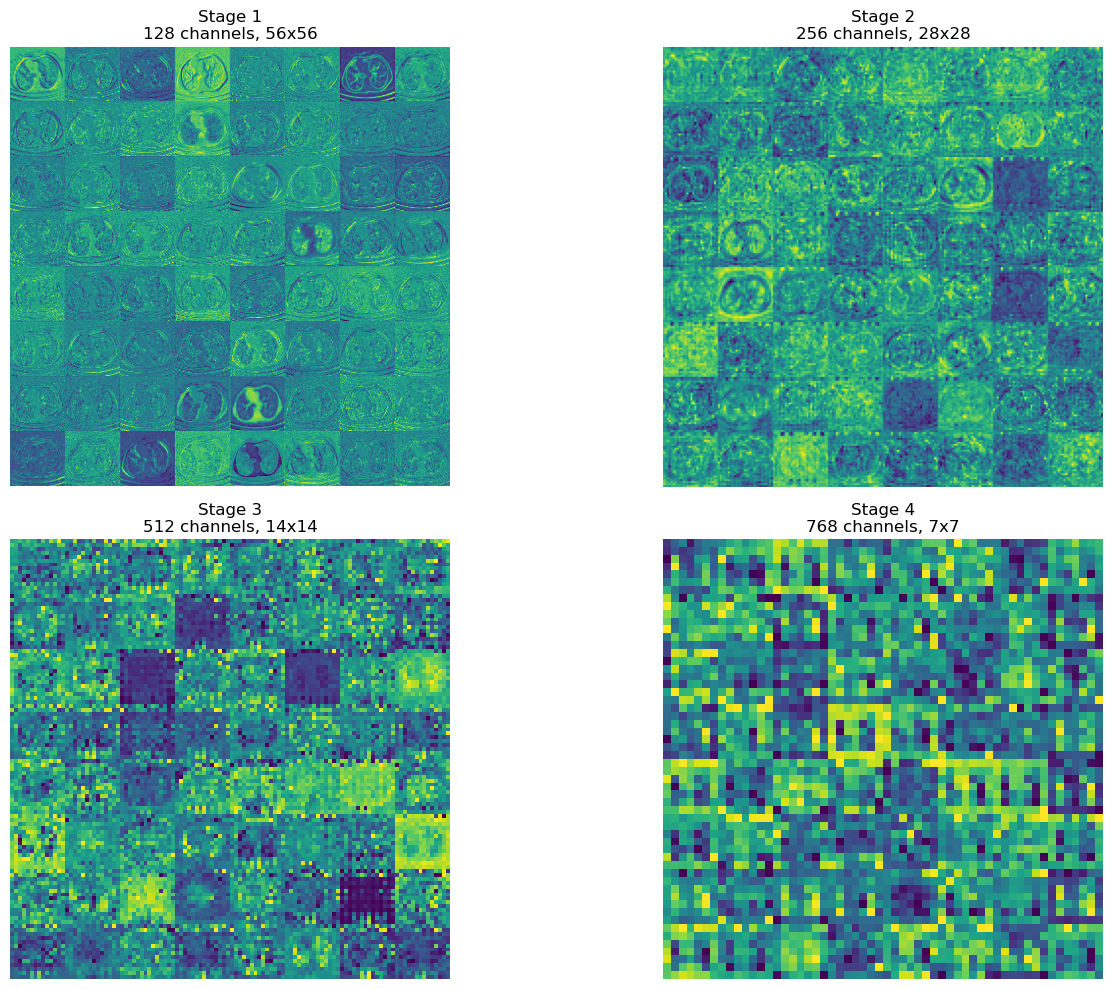


可视化第一层的前4个通道:


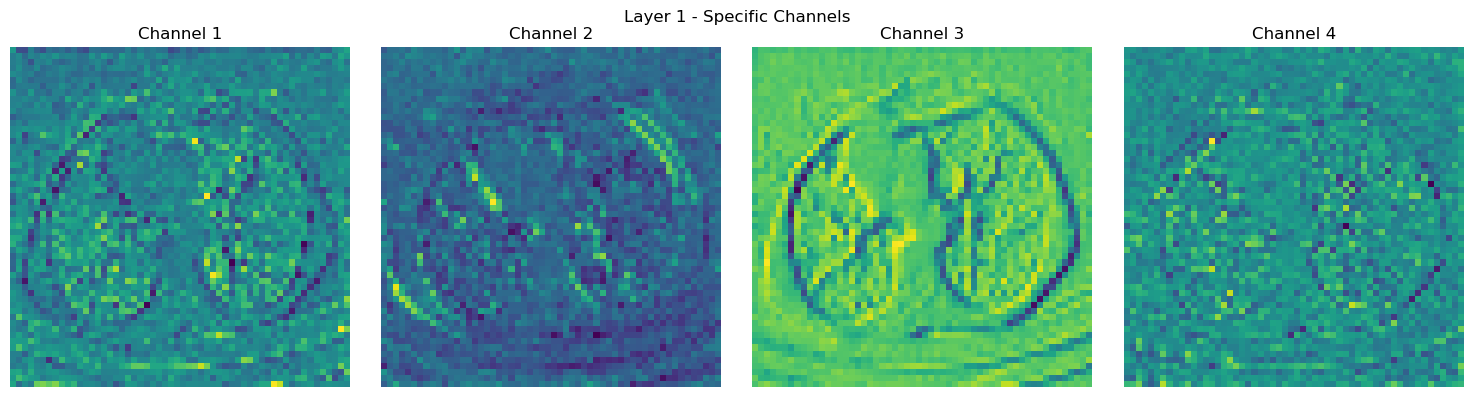


可视化第二层的前4个通道:


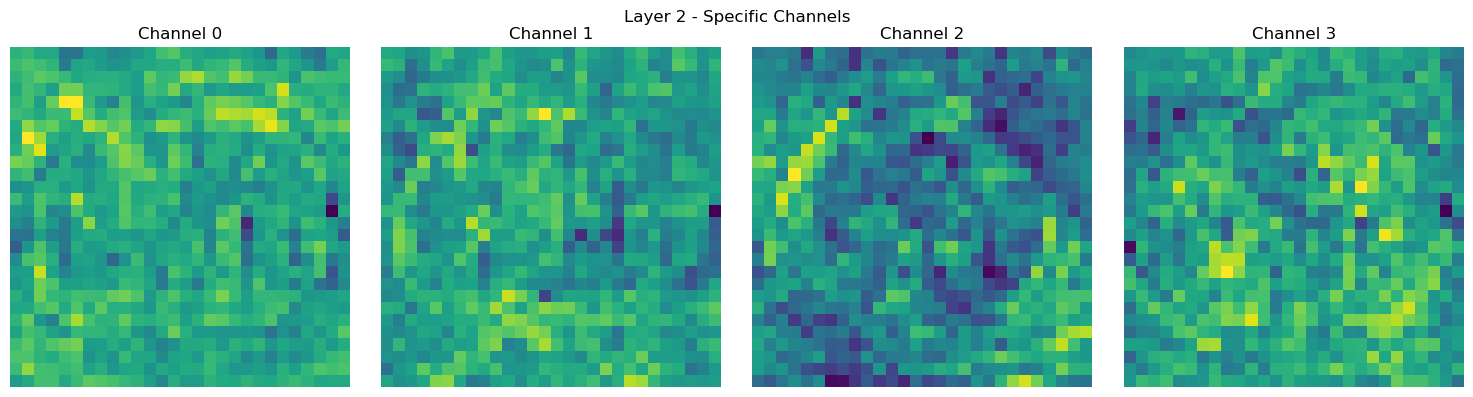

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

def visualize_feature_maps(output, layer_names=None, max_channels=64, figsize=(15, 10)):
    num_layers = len(output)
    if layer_names is None:
        layer_names = [f'Layer {i+1}' for i in range(num_layers)]

    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()

    for i, (feature_map, layer_name) in enumerate(zip(output, layer_names)):
        if i >= 4: 
            break

        ax = axes[i]

        feat = feature_map.detach().cpu()

        channels = min(feat.shape[1], max_channels)

        feat_single = feat[0, :channels, :, :]  # (channels, height, width)

        nrows = int(np.ceil(np.sqrt(channels)))
        ncols = int(np.ceil(channels / nrows))

        canvas_height = nrows * feat_single.shape[1]
        canvas_width = ncols * feat_single.shape[2]
        canvas = np.zeros((canvas_height, canvas_width))

        for c in range(channels):
            row = c // ncols
            col = c % ncols
            h_start = row * feat_single.shape[1]
            h_end = (row + 1) * feat_single.shape[1]
            w_start = col * feat_single.shape[2]
            w_end = (col + 1) * feat_single.shape[2]

            channel_data = feat_single[c].numpy()
            channel_data = (channel_data - channel_data.min()) / (channel_data.max() - channel_data.min() + 1e-8)
            canvas[h_start:h_end, w_start:w_end] = channel_data

        ax.imshow(canvas, cmap='viridis')
        ax.set_title(f'{layer_name}\n{feat.shape[1]} channels, {feat.shape[2]}x{feat.shape[3]}')
        ax.axis('off')

    for i in range(num_layers, 4):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def visualize_average_feature_maps(output, layer_names=None, figsize=(15, 4)):

    num_layers = len(output)
    if layer_names is None:
        layer_names = [f'Layer {i+1}' for i in range(num_layers)]

    fig, axes = plt.subplots(1, num_layers, figsize=figsize)
    if num_layers == 1:
        axes = [axes]

    for i, (feature_map, layer_name) in enumerate(zip(output, layer_names)):
        ax = axes[i]

        feat = feature_map.detach().cpu()

        avg_feat = feat[0].mean(dim=0).numpy()  # (height, width)

        im = ax.imshow(avg_feat, cmap='viridis')
        ax.set_title(f'{layer_name}\nAvg of {feat.shape[1]} channels')
        ax.axis('off')

        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

def visualize_specific_channels(output, layer_idx=0, channel_indices=[0, 1, 2, 3], figsize=(15, 4)):

    feature_map = output[layer_idx].detach().cpu()
    feat_single = feature_map[0]  # (channels, height, width)

    fig, axes = plt.subplots(1, len(channel_indices), figsize=figsize)
    if len(channel_indices) == 1:
        axes = [axes]

    for i, channel_idx in enumerate(channel_indices):
        if channel_idx >= feat_single.shape[0]:
            continue

        ax = axes[i]
        channel_data = feat_single[channel_idx].numpy()

        channel_data = (channel_data - channel_data.min()) / (channel_data.max() - channel_data.min() + 1e-8)

        ax.imshow(channel_data, cmap='viridis')
        ax.set_title(f'Channel {channel_idx}')
        ax.axis('off')

    plt.suptitle(f'Layer {layer_idx+1} - Specific Channels')
    plt.tight_layout()
    plt.show()

print("Visualize the average feature map across all layers:")
visualize_average_feature_maps(output, layer_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])

print("\n Visualize feature maps for all layers:")
visualize_feature_maps(output, layer_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])

print("\n Visualize the first four channels of the first layer:")
visualize_specific_channels(output, layer_idx=0, channel_indices=[1, 2, 3, 4])

print("\n Visualize the first four channels of the second layer:")
visualize_specific_channels(output, layer_idx=1, channel_indices=[0, 1, 2, 3])


C:\Users\Video\AppData\Local\Temp\ipykernel_103488\2442099820.py:20: UserWarning: Glyph 20498 (\N{CJK UNIFIED IDEOGRAPH-5012}) missing from current font.
  plt.tight_layout()
C:\Users\Video\AppData\Local\Temp\ipykernel_103488\2442099820.py:20: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
C:\Users\Video\AppData\Local\Temp\ipykernel_103488\2442099820.py:20: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  plt.tight_layout()
C:\Users\Video\AppData\Local\Temp\ipykernel_103488\2442099820.py:20: UserWarning: Glyph 22235 (\N{CJK UNIFIED IDEOGRAPH-56DB}) missing from current font.
  plt.tight_layout()
C:\Users\Video\AppData\Local\Temp\ipykernel_103488\2442099820.py:20: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  plt.tight_layout()
C:\Users\Video\AppData\Local\Temp\ipykernel_103488\2442099820.py:20: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}

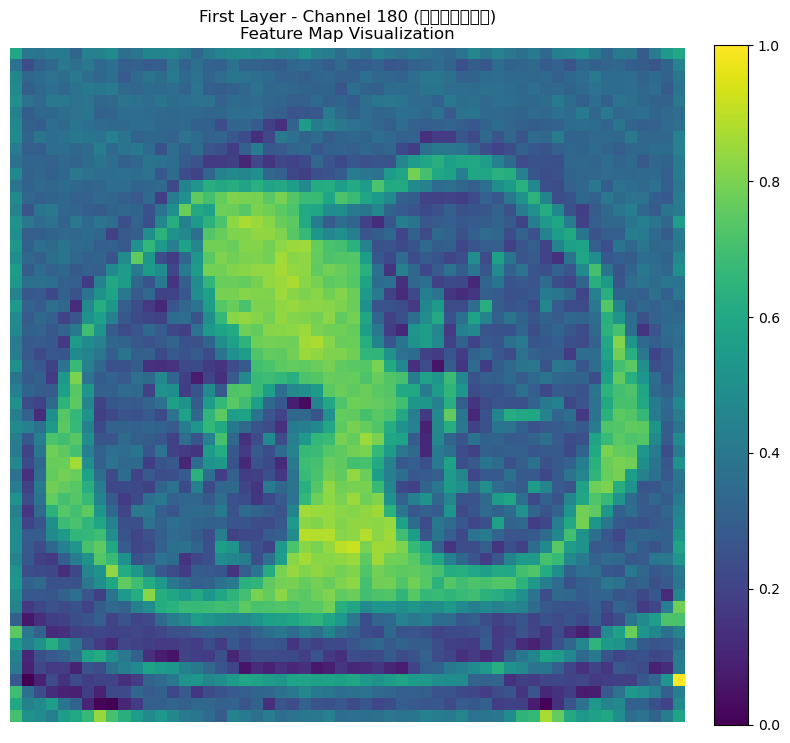

特征图形状: (56, 56)
最小值: -9.1441
最大值: -0.1838
平均值: -5.4600


In [6]:
import matplotlib.pyplot as plt
import torch

first_layer_output = output[0]  

channel_index = 52  
feature_map = first_layer_output[0, channel_index, :, :].detach().cpu().numpy()


plt.figure(figsize=(8, 8))
plt.imshow(feature_map_normalized, cmap='viridis')
plt.title(f'First Layer - Channel {first_layer_output.shape[1] + channel_index} (Fourth-to-last channel)\nFeature Map Visualization')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Feature map shape: {feature_map.shape}")
print(f"minimum value: {feature_map.min():.4f}")
print(f"maximum value: {feature_map.max():.4f}")
print(f"mean value: {feature_map.mean():.4f}")


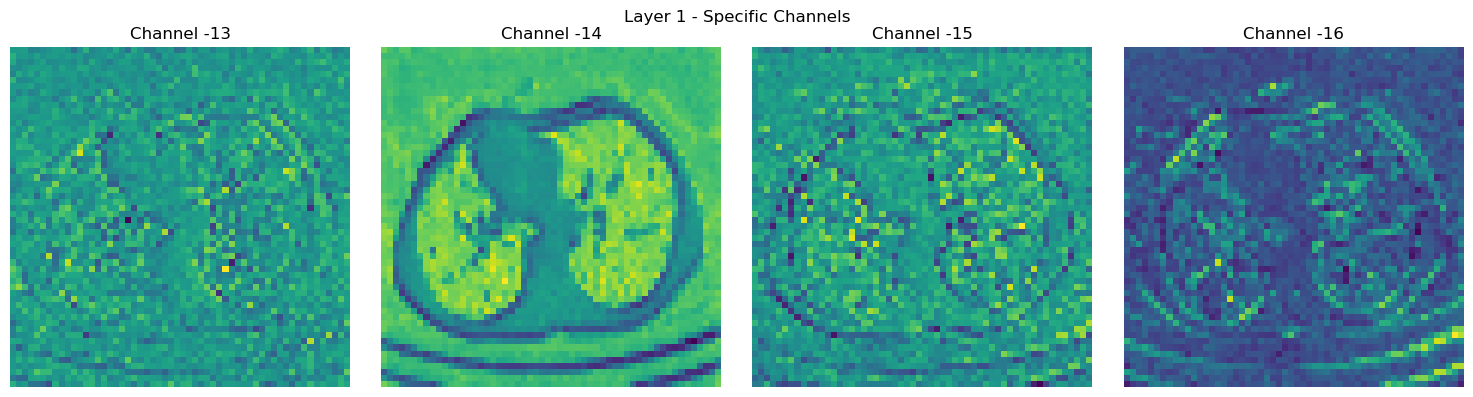

In [12]:
visualize_specific_channels(output, layer_idx=0, channel_indices=[-13, -14,-15,-16 ])

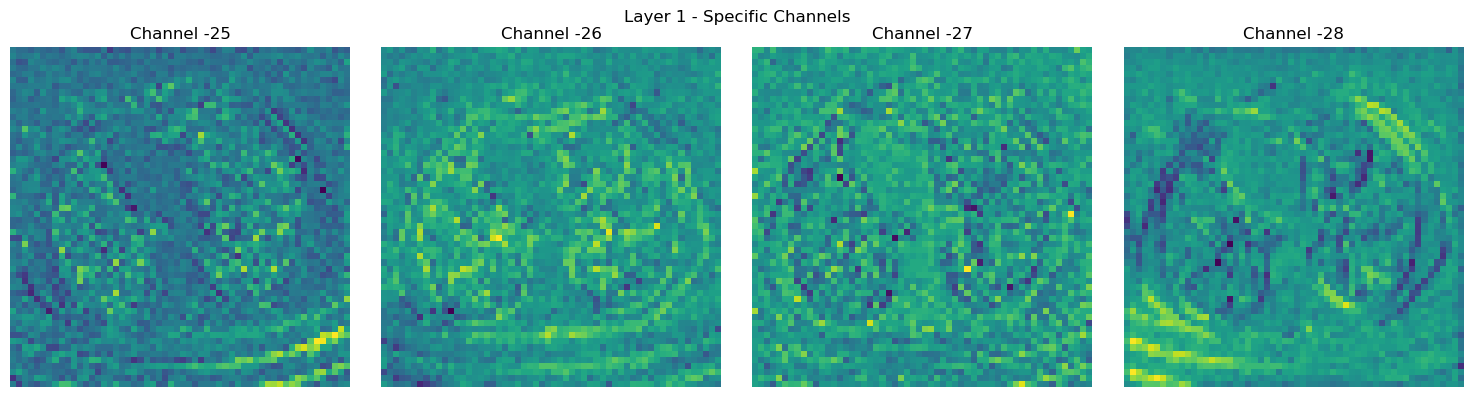

In [11]:
visualize_specific_channels(output, layer_idx=0, channel_indices=[-25, -26, -27, -28])